In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('hand_scraped_data.csv')

df.head()

,brand,price,year,mileage,damage_type,number_of_owners,number_of_services
0,Dodge,14499,2015,115373,unknown,2,9
1,Kia,9995,2017,84579,none,1,3
2,Chevrolet,11995,2017,77315,none,3,13
3,Nissan,9995,2015,94783,none,1,15
4,Volkswagen,11977,2021,137978,none,1,13


In [3]:
df.sample(5)

,brand,price,year,mileage,damage_type,number_of_owners,number_of_services
3,Nissan,9995,2015,94783,none,1,15
6,Toyota,9990,2014,133785,accident,2,15
20,Toyota,23999,2023,5768,none,1,4
0,Dodge,14499,2015,115373,unknown,2,9
14,Honda,18553,2020,42279,none,2,7


In [9]:
from sklearn.preprocessing import LabelEncoder

damage_encoder = LabelEncoder()
brand_encoder = LabelEncoder()


df['tokenized_brand'] = brand_encoder.fit_transform(df['brand'])
df['tokenized_damage'] = damage_encoder.fit_transform(df['damage_type'])

df.head()


,brand,price,year,mileage,damage_type,number_of_owners,number_of_services,brand_tokenized,tokenized_damage,tokenized_brand
0,Dodge,14499,2015,115373,unknown,2,9,1,3,1
1,Kia,9995,2017,84579,none,1,3,4,2,4
2,Chevrolet,11995,2017,77315,none,3,13,0,2,0
3,Nissan,9995,2015,94783,none,1,15,6,2,6
4,Volkswagen,11977,2021,137978,none,1,13,8,2,8


In [5]:
"""
Initializes the neural network model.
The model has 6 inputs, 12 neurons in hidden layer 1, 6 neurons in hidden layer 2, 3 neurons in hidden layer 3, and 1 output.
"""
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(6, 12)
        self.hidden1 = nn.Linear(12, 6)
        self.hidden2 = nn.Linear(6, 3)
        self.output = nn.Linear(3, 1)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.hidden1(x))
        x = F.leaky_relu(self.hidden2(x))
        x = self.output(x)
        return x

model = NeuralNetwork()

In [6]:
"""
Initializes the weights and biases of the neural network.
"""
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

model.apply(weights_init)

Net(
  (fc1): Linear(in_features=6, out_features=12, bias=True)
  (hidden1): Linear(in_features=12, out_features=6, bias=True)
  (hidden2): Linear(in_features=6, out_features=3, bias=True)
  (output): Linear(in_features=3, out_features=1, bias=True)
)

In [64]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.01)
epochs = 1000
losses = []

In [65]:
for epoch in range(epochs):
    run_number = 0
    for _ in df.iterrows():

        batch = df.sample(5)
        inputs = torch.tensor(batch[['year', 'mileage', 'tokenized_damage', 'number_of_owners', 'number_of_services', 'tokenized_brand']].values, dtype=torch.float32)
        target = torch.tensor(batch['price'].values, dtype=torch.float32).unsqueeze(1)

        # Convert the row to a tensor
        #inputs = torch.from_numpy(np.array([
        #    float(row['year']),  # Convert to float
        #    float(row['mileage']),  # Convert to float
        #    float(row['tokenized_damage']),  # Convert to float
        #    float(row['number_of_owners']),  # Convert to float
        #    float(row['number_of_services']),  # Convert to float
        #    float(row['tokenized_brand'])
        #])).float().unsqueeze(0)  # Add an extra dimension for batch size

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, target)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        run_number += 1

        if epoch % 500 == 0 and run_number % 10 == 0:
            print(f'Epoch {epoch} Loss: {loss.item()}')
            continue

    
        losses.append(loss.item())
        
losses.append(loss.item())

Epoch 0 Loss: 9620878.0

Epoch 0 Loss: 7249526.5

Epoch 0 Loss: 8908156.0

Epoch 500 Loss: 6237861.0

Epoch 500 Loss: 7840510.5

Epoch 500 Loss: 7236588.0



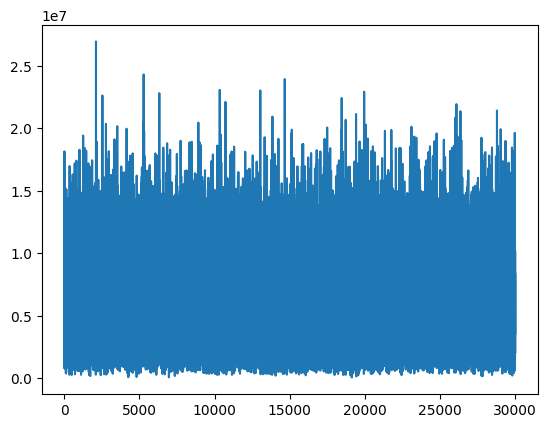

In [66]:
x = [i for i in range(len(losses))]
#print(min(losses))
plt.plot(x, losses)

In [67]:
def predict_car_price(year, mileage, damage_type, number_of_owners, number_of_services, brand):
    # Encode categorical variables
    tokenized_brand = brand_encoder.transform([brand])[0]
    tokenized_damage = damage_encoder.transform([damage_type])[0]
    
    # Create input tensor
    inputs = torch.tensor([
        [year, mileage, tokenized_damage, number_of_owners, number_of_services, tokenized_brand]
    ]).float()
    
    # Make prediction
    prediction = model(inputs)
    
    return prediction.item()


In [68]:
predict_car_price(2021,0,'none',1,0,'Honda')

21683.09375

In [69]:
df.sample(10)

,brand,price,year,mileage,damage_type,number_of_owners,number_of_services,brand_tokenized,tokenized_damage,tokenized_brand
2,Chevrolet,11995,2017,77315,none,3,13,0,2,0
15,Honda,20933,2021,62620,none,1,3,3,2,3
5,Honda,7595,2011,136150,none,2,9,3,2,3
0,Dodge,14499,2015,115373,unknown,2,9,1,3,1
4,Volkswagen,11977,2021,137978,none,1,13,8,2,8
25,Ford,15758,2019,63569,unknown,2,12,2,3,2
14,Honda,18553,2020,42279,none,2,7,3,2,3
1,Kia,9995,2017,84579,none,1,3,4,2,4
22,Toyota,30490,2022,19184,none,1,5,7,2,7
16,Honda,18533,2020,42289,none,2,7,3,2,3


Text(0, 0.5, 'Price')

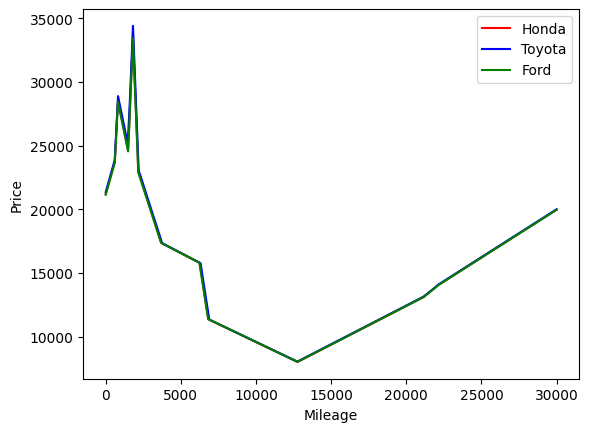

In [70]:
honda_prediction_arr_mileage = []
toyota_prediction_arr_mileage = []
ford_prediction_arr_mileage = []
i=0
while i < 300000:
    honda_prediction_arr_mileage.append(predict_car_price(2024, i, 'none', 1, 5, 'Honda'))
    toyota_prediction_arr_mileage.append(predict_car_price(2024, i, 'none', 1, 5, 'Toyota'))
    ford_prediction_arr_mileage.append(predict_car_price(2024, i, 'none', 1, 5, 'Ford'))
    i += 10
plt.plot([i for i in range(len(honda_prediction_arr_mileage))], honda_prediction_arr_mileage, color='red', label='Honda')
plt.plot([i for i in range(len(toyota_prediction_arr_mileage))], toyota_prediction_arr_mileage, color='blue', label='Toyota')
plt.plot([i for i in range(len(ford_prediction_arr_mileage))], ford_prediction_arr_mileage, color='green', label='Ford')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

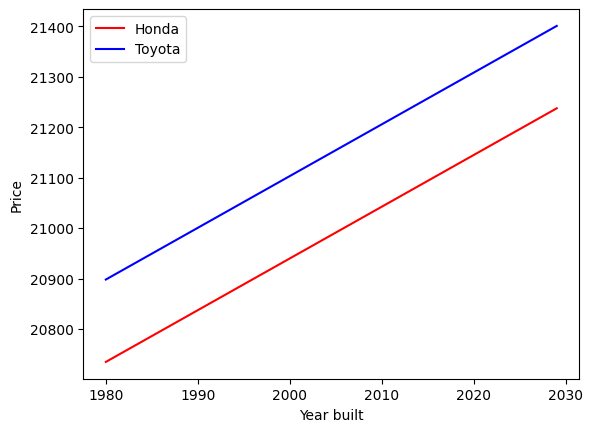

In [71]:
honda_prediction_arr_age = []
toyota_prediction_arr_age = []
ages = []

for i in range(1980, 2030):
    ages.append(i)
    honda_prediction_arr_age.append(predict_car_price(i, 0, 'none', 1, 5, 'Honda'))
    toyota_prediction_arr_age.append(predict_car_price(i, 0, 'none', 1, 5, 'Toyota'))

plt.plot(ages, honda_prediction_arr_age, color='red', label='Honda')
plt.plot(ages, toyota_prediction_arr_age, color='blue', label='Toyota')
plt.legend()
plt.xlabel('Year built')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

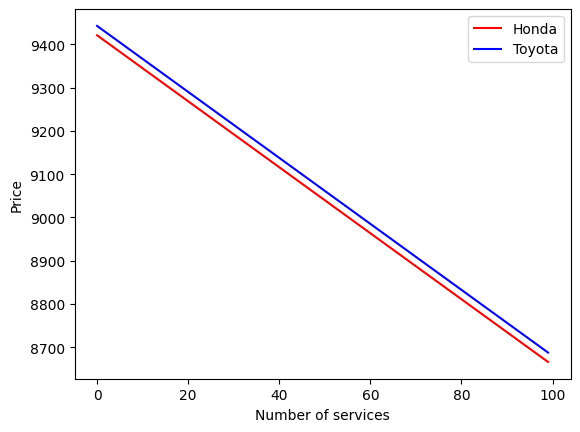

In [72]:
honda_prediction_services_arr = []
toyota_prediction_services_arr = []
i=0
while i < 100:
    honda_prediction_services_arr.append(predict_car_price(2024, 150000, 'none', 1, i, 'Honda'))
    toyota_prediction_services_arr.append(predict_car_price(2024, 150000, 'none', 1, i, 'Toyota'))
    i += 1
plt.plot([i for i in range(len(honda_prediction_services_arr))], honda_prediction_services_arr, color='red', label='Honda')
plt.plot([i for i in range(len(toyota_prediction_services_arr))], toyota_prediction_services_arr, color='blue', label='Toyota')
plt.legend()
plt.xlabel('Number of services')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

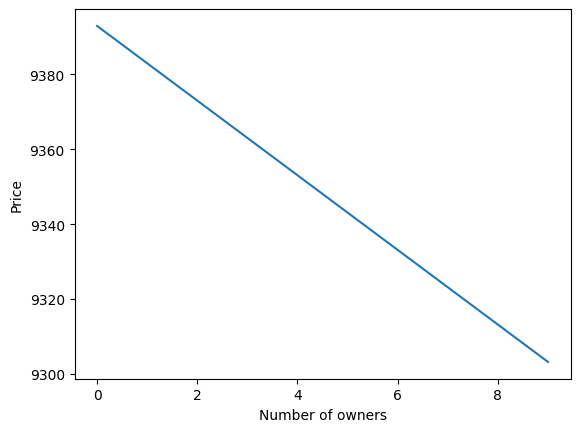

In [73]:
honda_prediction_owner_arr = []
i=0
while i < 10:
    honda_prediction_owner_arr.append(predict_car_price(2024, 150000, 'none', i, 5, 'Honda'))
    i += 1
plt.plot([i for i in range(len(honda_prediction_owner_arr))], honda_prediction_owner_arr, )
plt.xlabel('Number of owners')
plt.ylabel('Price')

In [63]:
predict_car_price(2010, 175000, 'none', 1, 100, 'Honda')

9562.451171875

</h> I wonder if a decision tree would work better <h>

In [1000]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

In [1001]:
model_decision_tree = DecisionTreeRegressor(criterion='squared_error')
model_decision_tree.fit(df[['year', 'mileage', 'tokenized_damage', 'number_of_owners', 'number_of_services', 'tokenized_brand']], df['price'])

DecisionTreeRegressor()

In [1002]:
def decision_tree_predict(year, mileage, damage_type, number_of_owners, number_of_services, brand):
    tokenized_brand = brand_encoder.transform([brand])[0]
    tokenized_damage = damage_encoder.transform([damage_type])[0]
    return model_decision_tree.predict([[year, mileage, tokenized_damage, number_of_owners, number_of_services, tokenized_brand]])[0]

In [1006]:
def compare_models(year, mileage, damage_type, number_of_owners, number_of_services, brand, price):
    decision_tree_prediction = decision_tree_predict(year, mileage, damage_type, number_of_owners, number_of_services, brand)
    neural_network_prediction = predict_car_price(year, mileage, damage_type, number_of_owners, number_of_services, brand)
    print(f"Decision tree: {decision_tree_prediction}, Neural Network: {neural_network_prediction}")
    print(f"Real price: {price}")
    print(f"\n")
    print(f"Decision tree error: {abs(price - decision_tree_prediction)}")
    print(f"Neural network error: {abs(price - neural_network_prediction)}")
    print(f"\n")

In [1011]:
compare_models(2011, 104992, 'none', 2, 10, 'Ford', 5999)

Decision tree: 5999.0, Neural Network: 9938.4326171875
Real price: 5999


Decision tree error: 0.0
Neural network error: 3939.4326171875




c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [1]:
compare_models(2021, 23734, 'none', 1, 5, 'Honda', 25997)

NameError: name 'compare_models' is not defined

In [1013]:
compare_models(2021, 15679, 'none', 1, 6, 'Toyota', 28490)

Decision tree: 30490.0, Neural Network: 25399.37890625
Real price: 28490


Decision tree error: 2000.0
Neural network error: 3090.62109375




c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [1014]:
compare_models(2023, 2178, 'none', 1, 5, 'Toyota', 24499)

Decision tree: 30490.0, Neural Network: 20663.64453125
Real price: 24499


Decision tree error: 5991.0
Neural network error: 3835.35546875




c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [1015]:
compare_models(2022, 99998, 'none', 1, 11, 'Toyota', 17999)

Decision tree: 11977.0, Neural Network: 10668.04296875
Real price: 17999


Decision tree error: 6022.0
Neural network error: 7330.95703125




c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
food = {
    fortnite: 'good',
    hotdog: 'good',
    pizza: 'good',
    burger: 'good',
    soup: 'wet',
    salad: 'green',
    icecream: 'cold'
}